In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train =pd.read_csv('/content/train_291021.csv')
print(train.shape)


(2359, 15)


In [4]:
train_data = train.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)
print(train_data.shape)
#train_data

(2359, 8)


## ignore

In [5]:
i = 0 
n_time_steps = 100
Ax_tr = train_data['Ax'].values[i: i + n_time_steps]

Ay_tr = train_data['Ay'].values[i: i + n_time_steps]

Az_tr = train_data['Az'].values[i: i + n_time_steps]

Gx_tr = train_data['Gx'].values[i: i + n_time_steps]

Gy_tr = train_data['Gy'].values[i: i + n_time_steps]

Gz_tr = train_data['Gz'].values[i: i + n_time_steps]

Speed_tr = train_data['Speed'].values[i: i + n_time_steps]
label_tr = stats.mode(train_data['Label'][i: i + n_time_steps],axis = None)[0][0]

# print(train_data[i:i+n_time_steps])
# print(label_tr)

In [ ]:
train_data.dropna(axis=0, how='any', inplace=True)
print(train_data.shape)

(2359, 8)


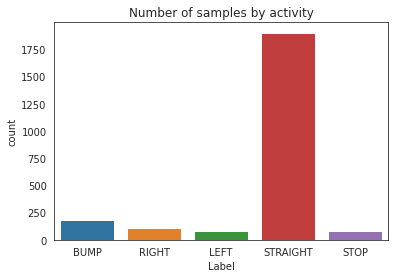

In [ ]:
sns.set_style('white')
sns.countplot(x = 'Label', data = train_data)
plt.title('Number of samples by activity')
plt.show()

## Look 

In [201]:
n_time_steps = 15
n_features = 7 
step = n_time_steps
# straight,left,right,bump etc
n_classes = 5 
n_epochs = 35      
batch_size = 32   
learning_rate = 0.0001
l2_loss = 0.0015

segments = []
labels = []


Divide the dataset into sets of length time_steps

In [202]:
for i in range(0,  train_data.shape[0]- n_time_steps, step):  

    Ax_tr = train_data['Ax'].values[i: i + n_time_steps]

    Ay_tr = train_data['Ay'].values[i: i + n_time_steps]

    Az_tr = train_data['Az'].values[i: i + n_time_steps]

    Gx_tr = train_data['Gx'].values[i: i + n_time_steps]

    Gy_tr = train_data['Gy'].values[i: i + n_time_steps]

    Gz_tr = train_data['Gz'].values[i: i + n_time_steps]

    Speed_tr = train_data['Speed'].values[i: i + n_time_steps]


    label_tr = stats.mode(train_data['Label'][i: i + n_time_steps])[0][0]

    segments.append([Ax_tr, Ay_tr, Az_tr, Gx_tr,Gy_tr,Gz_tr,Speed_tr])

    labels.append(label_tr)

Convert the list into numpy array

In [203]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

reshaped_segments.shape

(157, 15, 7)

Divide the segments array into training and testing data to avoid overfitting

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels,test_size = 0.2)


In [205]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(125, 15, 7)
(32, 15, 7)
(125, 5)
(32, 5)


In [206]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

model = Sequential()
# RNN layer
model.add(LSTM(units = 100, input_shape = (X_train.shape[1], X_train.shape[2])))

# Dropout layer
model.add(Dropout(0.4))
 
# Dense layer with ReLu
model.add(Dense(units = 32, activation='tanh'))

# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softplus'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100)               43200     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 32)                3232      
                                                                 
 dense_33 (Dense)            (None, 5)                 165       
                                                                 
Total params: 46,597
Trainable params: 46,597
Non-trainable params: 0
_________________________________________________________________


In [207]:
print(X_test.shape)
print(X_train.shape)

(32, 15, 7)
(125, 15, 7)


In [208]:
model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size)

Epoch 1/35
4/4 [==============================] - 3s 224ms/step - loss: 1.3533 - accuracy: 0.6000 - val_loss: 0.9866 - val_accuracy: 0.8750
Epoch 2/35
4/4 [==============================] - 0s 28ms/step - loss: 1.0264 - accuracy: 0.7920 - val_loss: 0.7331 - val_accuracy: 0.8750
Epoch 3/35
4/4 [==============================] - 0s 23ms/step - loss: 0.8295 - accuracy: 0.7920 - val_loss: 0.6157 - val_accuracy: 0.8750
Epoch 4/35
4/4 [==============================] - 0s 24ms/step - loss: 0.7826 - accuracy: 0.7920 - val_loss: 0.5503 - val_accuracy: 0.8750
Epoch 5/35
4/4 [==============================] - 0s 34ms/step - loss: 0.7103 - accuracy: 0.7920 - val_loss: 0.5133 - val_accuracy: 0.8750
Epoch 6/35
4/4 [==============================] - 0s 26ms/step - loss: 0.6800 - accuracy: 0.7920 - val_loss: 0.4901 - val_accuracy: 0.8750
Epoch 7/35
4/4 [==============================] - 0s 28ms/step - loss: 0.6481 - accuracy: 0.7920 - val_loss: 0.4722 - val_accuracy: 0.8750
Epoch 8/35
4/4 [==========

1/1 [==============================] - 1s 872ms/step


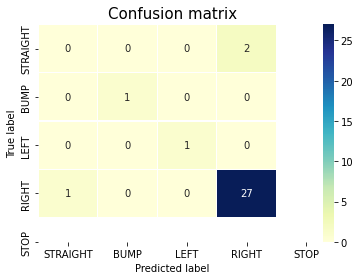

In [209]:
import sklearn.metrics as metrics

predictions = model.predict(X_test)
class_labels = [ 'STRAIGHT', 'BUMP', 'LEFT',  'RIGHT','STOP']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [210]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss) 

1/1 [==============================] - 0s 23ms/step - loss: 0.2985 - accuracy: 0.9062
Test Accuracy : 0.90625
Test Loss : 0.29850178956985474
